In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# modulos que están en la carpeta
# import text_curv as tc  # para añadir texto curveado
import plt_conf as conf  # modulo de configuración de gráfico
import moduloA as mod

from scipy.optimize import fsolve

In [3]:
# cargando el módulo particular de las configuraciones
conf.general()  # cargando configuración general

In [4]:
phi, mu, b, eta, beta, epsilon, delta = sp.symbols('phi, mu, b, eta, beta, epsilon, delta', real=True)

In [5]:
# Cargando la ecuación de uf con phi=phi+delta 
uEq = mod.eq()
uEqTrab = sp.expand(1/uEq)

#### Solución analítica

In [6]:
# Calculando r1
r1 = sp.series(uEqTrab, x=epsilon, x0=0, n=3, dir="+").removeO()

In [7]:
# Creando una función lambda ya en las nuevas variables. Es decir, beta=1, mu=1, epsilon=1
Adim = [(mu, 1), (beta, 1), (epsilon, 1)]
r1A = r1.evalf(subs=dict(Adim))

# R_func = sp.lambdify([phi, delta, mu, b, eta, beta, epsilon], r1, "numpy")
R_func = sp.lambdify([delta, phi, b, eta], r1A, "numpy")

In [8]:
# parámetros
Msun = 1.9885e30  # kg 
Rsun = 6.96e08  # m
G = 6.674e-11  #
c2 = 299792458**2  #
#epsilon = 1
muVal = 2*G/c2*Msun
#b = Rsun

In [9]:
# pq beta=0 no quita a Horndesky, y si nu ->nu=0 Sch metr
# Probando que se recupera la misma evaluación que Mathematica
# test = [(phi, 0.1), (mu, muVal), (b, Rsun), (eta, 0), (beta, 1), (epsilon, 1), (delta, 0.5)]
# r1.subs(dict(test))
# r1.evalf(subs=dict(test))

In [10]:
# graficando unas soluciones analíticas
theta = 0.4

delt1 = 1e-1*np.pi  # 
delt2 = -delt1

bVal = Rsun/muVal
deltbVal = 10

# valores de eta tilde
temp1 = [(0.5*muVal**2)/(10**(18+i/2)) for i in range(0, 6)]
# temp1 =np.logspace(-18, -16, 6)
etaArray = np.concatenate(([0], temp1), axis=None)

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_45573/2352025485.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6),


0.0
4.360846291927547e-12
1.3790206808390594e-12
4.360846291927546e-13
1.3790206808390595e-13
4.360846291927546e-14


(23.4, 25.3)

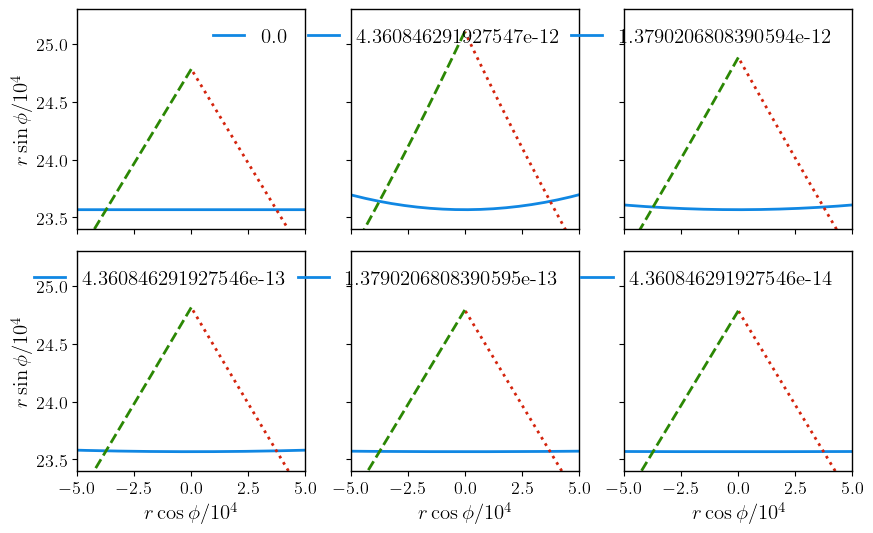

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6),
                       sharex=True, sharey=True,
                       gridspec_kw=dict(hspace=0.1, wspace=.2)) # espacio vertical y horizontal entre los subplots
ii, j = 0, 0
for i in range(6):
    print(etaArray[i])
    [delta, phi, b, eta]
    ax[j, ii].plot(R_func(0, mod.phidat(theta, 0), bVal, etaArray[i])*np.cos(mod.phidat(theta, 0))/1e04, 
                  R_func(0, mod.phidat(theta, 0), bVal, etaArray[i])*np.sin(mod.phidat(theta, 0))/1e04, color='#1087e3', label=r'%s'%str(etaArray[i]))
    
    ax[j, ii].plot(R_func(delt1, mod.phidat(theta, delt1), bVal+deltbVal, etaArray[i])*np.cos(mod.phidat(theta, delt1))/1e04, 
                  R_func(delt1, mod.phidat(theta, delt1), bVal+deltbVal, etaArray[i])*np.sin(mod.phidat(theta, delt1))/1e04, 
                   color='#d4240d', ls=':')
    
    ax[j, ii].plot(R_func(delt2, mod.phidat(theta, delt2), bVal+deltbVal, etaArray[i])*np.cos(mod.phidat(theta, delt2))/1e04, 
                  R_func(delt2, mod.phidat(theta, delt2), bVal+deltbVal, etaArray[i])*np.sin(mod.phidat(theta, delt2))/1e04, 
                  color='#2b8704', ls='--')
    
    
    #ax[j, ii].set_xlim(-1.3e8, 1.3e8)
    #ax[j, ii].set_ylim(6.9e8, 7.4e8)

    ax[j, ii].legend(frameon=False)
    
    ax[1, ii].set_xlabel(r'$r\cos\phi/10^4$')
    ax[j, 0].set_ylabel(r'$r\sin\phi/10^4$')
    
    if ii==2:
        j +=1 
        ii = 0
    else:
        ii += 1

        
ax[0, 0].set_xlim(-0.5e05/1e04, 0.5e05/1e04)
ax[0, 0].set_ylim(2.34e05/1e04, 2.53e05/1e04)



### Solución numérica

In [12]:
### SOLUCIÓN INDIVIDUAL ###

## PARÁMETROS ####
################
etaVal = 0  # Sch M
thetamin = 0.4
thetamax = np.pi-thetamin
bVal = Rsun/muVal
deltbVal = 10
#################

paramI = [etaVal, thetamin, thetamax, bVal]
deltbValV = [0, deltbVal, deltbVal]
deltaphiV = [thetamin, 0.5, 0.5] #[thetamin, np.pi/2, np.pi/2]

[theta1, r1, theta2, r2], [theta12, r12, theta22, r22], [theta13, r13, theta23, r23] = mod.Intind(paramI, deltbValV, deltaphiV, R_func, Nptos=1800)

Integración hacia la derecha
Integración hacia la izquierda
Integración hacia la derecha
Integración hacia la izquierda
Integración hacia la derecha
Integración hacia la izquierda


/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_23749/3420650987.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14, 4),


(23.566499999999998, 23.5685)

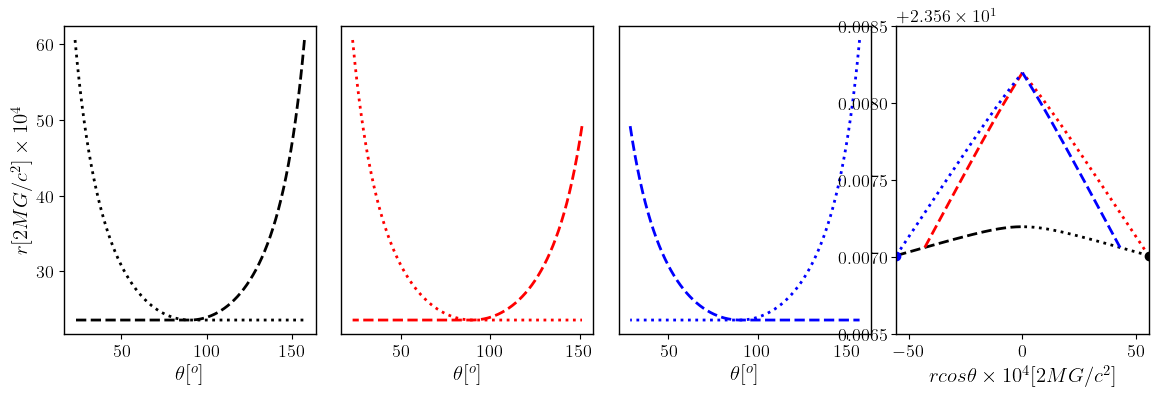

In [13]:
fac = 180/np.pi

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.1)) # espacio vertical y horizontal entre los subplots

ax[0].plot(theta1*fac, r1/1e04, ls=':', c='k')
ax[0].plot(theta2*fac, r2/1e04, ls='--', c='k')

ax[1].plot(theta12*fac, r12/1e04, ls=':', c='r') 
ax[1].plot(theta22*fac, r22/1e04, ls='--', c='r')

ax[2].plot(theta13*fac, r13/1e04, ls=':', c='b')
ax[2].plot(theta23*fac, r23/1e04, ls='--', c='b')


ax[1].set_yticks([])
ax[2].set_yticks([])

ax[0].set_xlabel(r'$\theta [{}^{o}]$')
ax[1].set_xlabel(r'$\theta [{}^{o}]$')
ax[2].set_xlabel(r'$\theta [{}^{o}]$')
ax[0].set_ylabel(r'$r [2 M G/c^{2}]\times 10^{4}$')

### TRIANGULO
ind = theta1<np.pi/2
ax[3].plot(r1[ind]*np.cos(theta1[ind])/1e04, r1[ind]*np.sin(theta1[ind])/1e04, ls=':', c='k')
ind = theta2>np.pi/2
ax[3].plot(r2[ind]*np.cos(theta2[ind])/1e04, r2[ind]*np.sin(theta2[ind])/1e04, ls='--', c='k')

ind = theta12<np.pi/2
ax[3].plot(r12[ind]*np.cos(theta12[ind])/1e04, r12[ind]*np.sin(theta12[ind])/1e04, ls=':', c='r')
ind = theta22>np.pi/2
ax[3].plot(r22[ind]*np.cos(theta22[ind])/1e04, r22[ind]*np.sin(theta22[ind])/1e04, ls='--', c='r')

ind = theta13>np.pi/2
ax[3].plot(r13[ind]*np.cos(theta13[ind])/1e04, r13[ind]*np.sin(theta13[ind])/1e04, ls=':', c='b')
ind = theta23<np.pi/2
ax[3].plot(r23[ind]*np.cos(theta23[ind])/1e04, r23[ind]*np.sin(theta23[ind])/1e04, ls='--', c='b')

r0 = R_func(0, thetamin, bVal, etaVal)
r02 = R_func(0, thetamax, bVal, etaVal)
ax[3].plot(r0*np.cos(thetamin)/1e04, r0*np.sin(thetamin)/1e04, 'ko')
ax[3].plot(r02*np.cos(thetamax)/1e04, r02*np.sin(thetamax)/1e04, 'bo')

ax[3].set_xlabel(r'$rcos\theta \times 10^{4} [2 M G/c^{2}]$')

ax[3].set_xlim(r02*np.cos(thetamax)/1e04, r0*np.cos(thetamin)/1e04)
ax[3].set_ylim(23.56+0.0065, 23.56+0.0085)

In [14]:
#### TRIANGULO ####

##### PARÁMETROS #####
etaVal = 0  # Sch M
thetamin = 0.4
thetamax = np.pi-thetamin
bVal = Rsun/muVal
deltbVal = 10
######################

paramI = [etaVal, thetamin, thetamax, bVal]
deltbValV = [0, deltbVal, deltbVal]
deltaphiV = [thetamin, 0.5, 0.5]  # [thetamin, 1, 1]

aa, _ = mod.triang(paramI, deltbValV, deltaphiV, R_func, Nptos=1000)

[_, theta1F, r1F], [_, theta2F, r2F], [_, theta3F, r3F] = aa
# [theta1T, r1T, theta2T, r2T], [theta12T, r12T, theta22T, r22T], [theta13T, r13T, theta23T, r23T] = bb

Integración hacia la derecha
Integración hacia la izquierda
[1.57079632]
Integración hacia la derecha
Integración hacia la izquierda
[1.5711422]
Integración hacia la derecha
Integración hacia la izquierda
[1.57045045]


In [15]:
ind = r1F==np.min(r1F)
delt0 = theta1F[ind][0]-np.pi/2 
func = lambda delt: R_func(delt, thetamin, bVal, etaVal)-r1F[0]

deltC = fsolve(func, delt0, xtol=1.49012e-12)[0]
print(delt0, deltC)

-4.008672283006831e-09 -1.9291874563561444e-17


In [16]:
(R_func(-deltC, mod.phidat(thetamin, -deltC), bVal+deltbVal, etaVal)*np.sin(mod.phidat(thetamin, -deltC))/1e04)[0], (r0*np.sin(thetamin)/1e04)

(23.568009604836057, 23.567009604836105)

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_23749/3296703557.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14, 4),


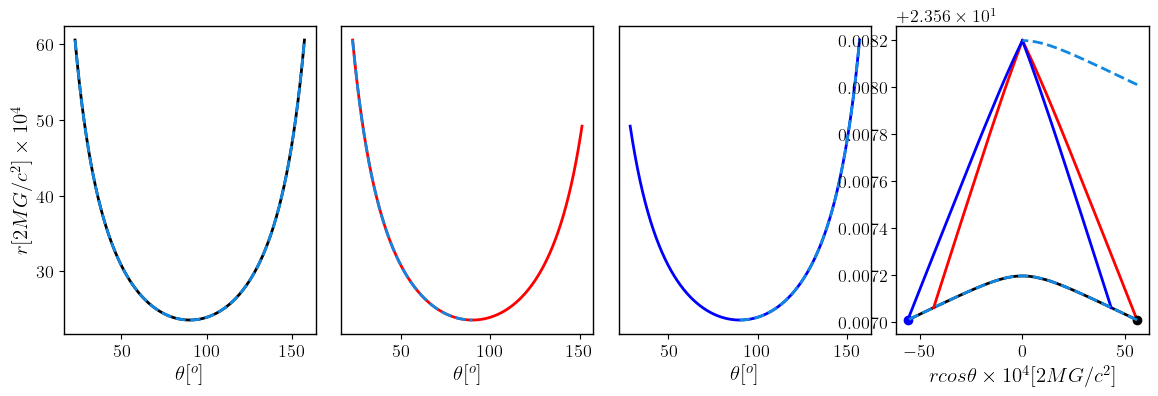

In [17]:
fac = 180/np.pi

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.1)) # espacio vertical y horizontal entre los subplots

ax[0].plot(theta1F*fac, r1F/1e04, ls='-', c='k')
ax[1].plot(theta2F*fac, r2F/1e04, ls='-', c='r') 
ax[2].plot(theta3F*fac, r3F/1e04, ls='-', c='b')

ax[1].set_yticks([])
ax[2].set_yticks([])

ax[0].set_xlabel(r'$\theta [{}^{o}]$')
ax[1].set_xlabel(r'$\theta [{}^{o}]$')
ax[2].set_xlabel(r'$\theta [{}^{o}]$')
ax[0].set_ylabel(r'$r [2 M G/c^{2}]\times 10^{4}$')

### TRIANGULO
ind = theta1F<np.pi/2
ax[3].plot(r1F*np.cos(theta1F)/1e04, r1F*np.sin(theta1F)/1e04, ls='-', c='k')
ax[3].plot(r2F*np.cos(theta2F)/1e04, r2F*np.sin(theta2F)/1e04, ls='-', c='r')
ax[3].plot(r3F*np.cos(theta3F)/1e04, r3F*np.sin(theta3F)/1e04, ls='-', c='b')

r0 = R_func(0, thetamin, bVal, etaVal)
r02 = R_func(0, thetamax, bVal, etaVal)
ax[3].plot(r0*np.cos(thetamin)/1e04, r0*np.sin(thetamin)/1e04, 'ko')
ax[3].plot(r02*np.cos(thetamax)/1e04, r02*np.sin(thetamax)/1e04, 'bo')

ax[3].set_xlabel(r'$rcos\theta \times 10^{4} [2 M G/c^{2}]$')

#ax[3].set_xlim(r02*np.cos(thetamax)/1e04, r0*np.cos(thetamin)/1e04)
#ax[3].set_ylim(23.56+0.0065, 23.56+0.0085)

#### ANALITICO  #####
delt = deltC

ax[0].plot(mod.phidat(thetamin, 0)*fac, R_func(0, mod.phidat(thetamin, 0), bVal, etaVal)/1e04, color='#1087e3', ls='--')
ax[1].plot(mod.phidat(thetamin, -delt)*fac, R_func(-delt, mod.phidat(thetamin, -delt), bVal+deltbVal, etaVal)/1e04, color='#1087e3', ls='--')
ax[2].plot(mod.phidat(thetamin, delt)*fac, R_func(delt, mod.phidat(thetamin, delt), bVal+deltbVal, etaVal)/1e04, color='#1087e3', ls='--')

ax[3].plot(R_func(0, mod.phidat(thetamin, 0), bVal, etaVal)*np.cos(mod.phidat(thetamin, 0))/1e04, 
           R_func(0, mod.phidat(thetamin, 0), bVal, etaVal)*np.sin(mod.phidat(thetamin, 0))/1e04, color='#1087e3', ls='--')

ax[3].plot(R_func(-delt, mod.phidat(thetamin, -delt), bVal+deltbVal, etaVal)*np.cos(mod.phidat(thetamin, -delt))/1e04, 
          R_func(-delt, mod.phidat(thetamin, -delt), bVal+deltbVal, etaVal)*np.sin(mod.phidat(thetamin, -delt))/1e04, color='#1087e3', ls='--')


#ax[3].plot(R_func(mod.phidat(thetamin, delt), delt, bVal+deltbVal, etaVal)*np.cos(mod.phidat(thetamin, delt))/1e04, 
#                  R_func(mod.phidat(thetamin, delt), delt, bVal+deltbVal, etaVal)*np.sin(mod.phidat(thetamin, delt))/1e04, 
#                   color='#1087e3', ls='--')

In [18]:
# valores de eta tilde
temp1 = [(0.5*muVal**2)/(10**(18+i/2)) for i in range(0, 6)]
etaArray = np.concatenate(([0], temp1), axis=None)

In [19]:
### SOLUCIÓN INDIVIDUAL ###

## PARÁMETROS ####
################
etaVal = etaArray[1]
thetamin = 0.4
thetamax = np.pi-thetamin
bVal = Rsun/muVal
deltbVal = 10
#################

print(etaVal)
print('')

paramI = [etaVal, thetamin, thetamax, bVal]
deltbValV = [0, deltbVal, deltbVal]
deltaphiV = [thetamin, np.pi/2, np.pi/2] #[thetamin, np.pi/2, np.pi/2]

[theta1, r1, theta2, r2], [theta12, r12, theta22, r22], [theta13, r13, theta23, r23] = mod.Intind(paramI, deltbValV, deltaphiV, R_func, Nptos=1800)

4.360846291927547e-12

Integración hacia la derecha
Integración hacia la izquierda
Integración hacia la derecha
Integración hacia la izquierda
Integración hacia la derecha
Integración hacia la izquierda


/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_23749/688243298.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14, 4),


(23.0, 24.0)

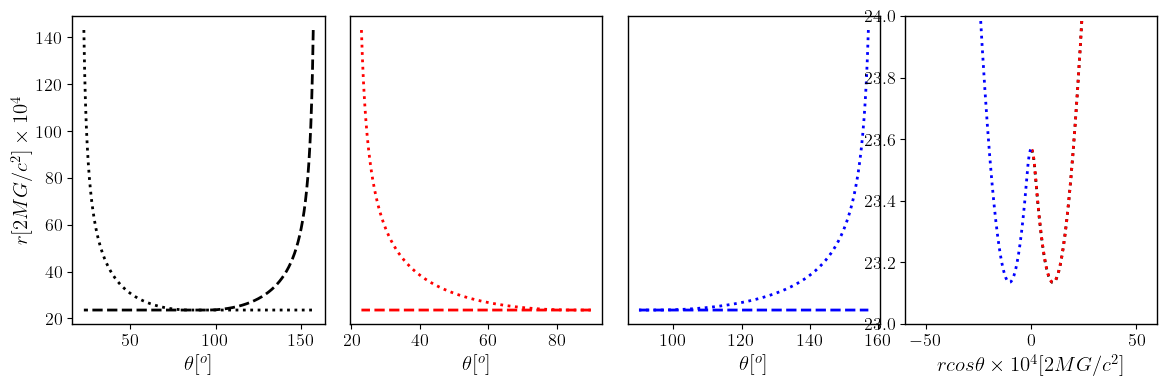

In [20]:
fac = 180/np.pi

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.1, wspace=.1)) # espacio vertical y horizontal entre los subplots

ax[0].plot(theta1*fac, r1/1e04, ls=':', c='k')
ax[0].plot(theta2*fac, r2/1e04, ls='--', c='k')

ax[1].plot(theta12*fac, r12/1e04, ls=':', c='r') 
ax[1].plot(theta22*fac, r22/1e04, ls='--', c='r')

ax[2].plot(theta13*fac, r13/1e04, ls=':', c='b')
ax[2].plot(theta23*fac, r23/1e04, ls='--', c='b')


ax[1].set_yticks([])
ax[2].set_yticks([])

ax[0].set_xlabel(r'$\theta [{}^{o}]$')
ax[1].set_xlabel(r'$\theta [{}^{o}]$')
ax[2].set_xlabel(r'$\theta [{}^{o}]$')
ax[0].set_ylabel(r'$r [2 M G/c^{2}]\times 10^{4}$')

### TRIANGULO
ind = theta1<np.pi/2
ax[3].plot(r1[ind]*np.cos(theta1[ind])/1e04, r1[ind]*np.sin(theta1[ind])/1e04, ls=':', c='k')
ind = theta2>np.pi/2
#ax[3].plot(r2[ind]*np.cos(theta2[ind])/1e04, r2[ind]*np.sin(theta2[ind])/1e04, ls='--', c='k')

ind = theta12<np.pi/2
ax[3].plot(r12[ind]*np.cos(theta12[ind])/1e04, r12[ind]*np.sin(theta12[ind])/1e04, ls=':', c='r')
ind = theta22>np.pi/2
#ax[3].plot(r22[ind]*np.cos(theta22[ind])/1e04, r22[ind]*np.sin(theta22[ind])/1e04, ls='--', c='r')

ind = theta13>np.pi/2
ax[3].plot(r13[ind]*np.cos(theta13[ind])/1e04, r13[ind]*np.sin(theta13[ind])/1e04, ls=':', c='b')
ind = theta23<np.pi/2
#ax[3].plot(r23[ind]*np.cos(theta23[ind])/1e04, r23[ind]*np.sin(theta23[ind])/1e04, ls='--', c='b')

r0 = R_func(0, thetamin, bVal, etaVal)
r02 = R_func(0, thetamax, bVal, etaVal)
ax[3].plot(r0*np.cos(thetamin)/1e04, r0*np.sin(thetamin)/1e04, 'ko')
ax[3].plot(r02*np.cos(thetamax)/1e04, r02*np.sin(thetamax)/1e04, 'bo')

ax[3].set_xlabel(r'$rcos\theta \times 10^{4} [2 M G/c^{2}]$')

# ax[3].set_xlim(r02*np.cos(thetamax)/1e04, r0*np.cos(thetamin)/1e04)
#ax[3].set_ylim(23.56+0.0065, 23.56+0.0085)
ax[3].set_xlim(-60, 60)
ax[3].set_ylim(23, 24)